# Lab 3

In [2]:
library('ISLR')
library(MASS)

## Section 4.6

### Logistic Regression

In [3]:
Smarket[0:10,] #print out some values of the Smarket dataset to see what it looks like
attach(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


Print out some information about the Smarket (stock market) dataset.

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

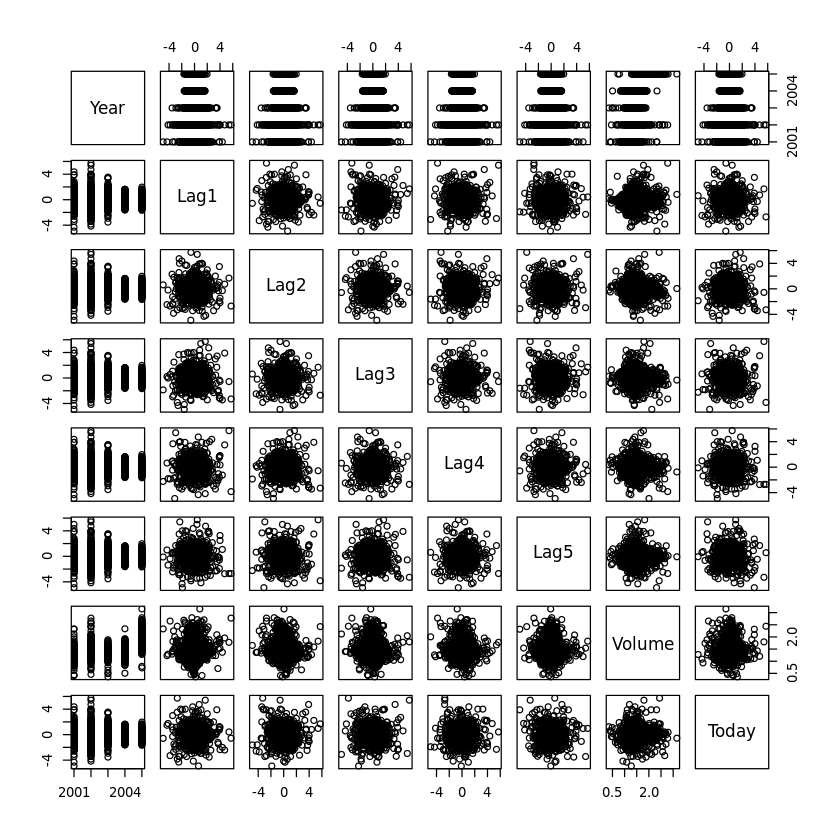

In [4]:
names(Smarket) #column names of Smarket
dim(Smarket) # dimensions of the dataset (9 columns, 1250 rows)
summary(Smarket) #info about data
pairs(Smarket[,-9]) #prints out plots of each possible pair of columns

In [5]:
cor(Smarket[,-9]) #prints out the correlation between the columns

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


By quickly glancing through the correlation table, we can see that the only substantial correlation factor is between Volume and Year. Let's ee what that looks like.

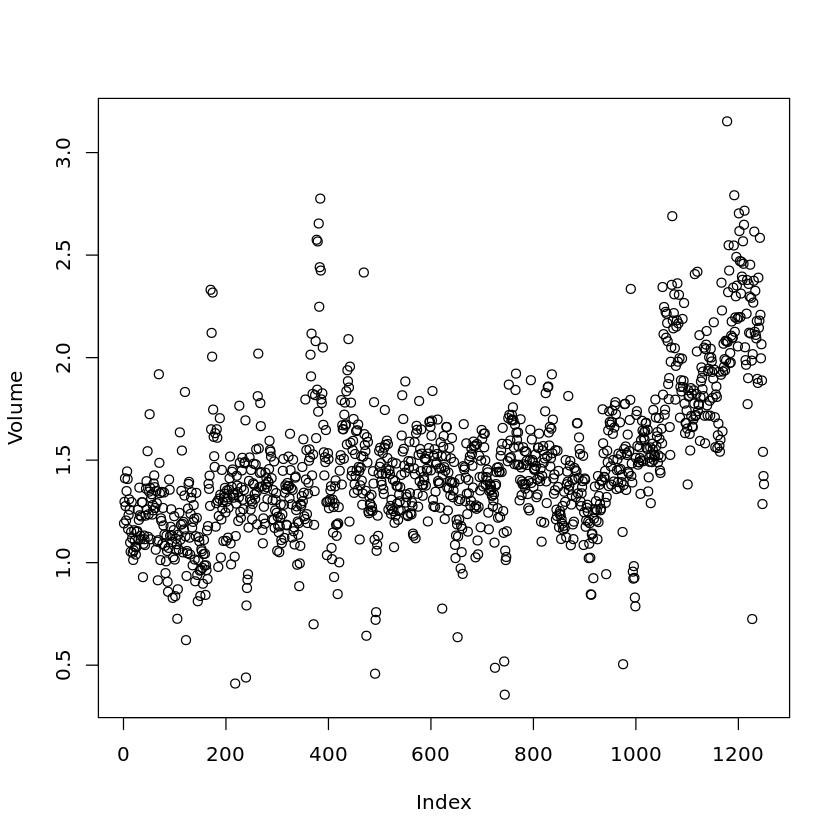

In [6]:
plot(Volume)

Let's try to fit a logistic model to this to try to classify if the stock market trend will go up or down!

In [7]:
logModel = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
logModel


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
  -0.126000    -0.073074    -0.042301     0.011085     0.009359     0.010313  
     Volume  
   0.135441  

Degrees of Freedom: 1249 Total (i.e. Null);  1243 Residual
Null Deviance:	    1731 
Residual Deviance: 1728 	AIC: 1742

In [8]:
summary(logModel)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


All of these p-values suck. Even the lowest one, on Lag 1, with a value of 0.145, we honestly have no sure way of proving that any of these predictors can be used to classify the direction of the stock market. Let's print out the probabilities on each instance and what the model predicted it to be. (Assuming that we can split the decision at $p(X)$ = .5)

In [9]:
logModelProbs = predict(logModel, type='response') #Predicts each value in the data set (lol) and then prints out the probability
logModelPredictions=rep('Down', dim(Smarket)[1]) #Creates a vector of 1250 (based on Smarket rows) and initializes them as 'down'
logModelPredictions[logModelProbs>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.

In [10]:
logModelProbs

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10        11        12        13        14        15        16 
0.5176135 0.4888378 0.4965211 0.5197834 0.5183031 0.4963852 0.4864892 0.5153660 
       17        18        19        20        21        22        23        24 
0.5053976 0.5319322 0.5167163 0.4983272 0.5229797 0.5221677 0.5340639 0.4920971 
       25        26        27        28        29        30        31        32 
0.5008751 0.5191211 0.4919679 0.5373796 0.5571306 0.5574363 0.5307063 0.5083437 
       33        34        35        36        37        38        39        40 
0.4714015 0.4949516 0.5471346 0.5260910 0.5203319 0.4902306 0.4760375 0.4850667 
       41        42        43        44        45        46        47        48 
0.4979462 0.5535387 0.6176442 0.5284518 0.5301251 0.5153681 0.5355161 0.4945795 
       49        50        51        52        53        54        55        56 
0.5249470 0.5735593 0.5455080 0.4765992 0.4531691 0.4544318 0.5379025 0.5591742 
       57        58        59        60        61        62        63        64 
0.4991918 0.5219328 0.5861722 0.5560757 0.4289095 0.4896402 0.5133387 0.4601776 
       65        66        67        68        69        70        71        72 
0.4962909 0.4847361 0.4972136 0.5013727 0.4537779 0.4608736 0.5284874 0.5541953 
       73        74        75        76        77        78        79        80 
0.5580780 0.4900787 0.4795402 0.4708035 0.5026603 0.4960765 0.5020786 0.5402471 
       81        82        83        84        85        86        87        88 
0.4971418 0.4894053 0.5092301 0.5158414 0.5121983 0.5110322 0.4992040 0.4979377 
       89        90        91        92        93        94        95        96 
0.4626107 0.4781316 0.5076532 0.4834586 0.5076192 0.5437706 0.5200800 0.5139898 
       97        98        99       100       101       102       103       104 
0.5265218 0.5379726 0.5111662 0.4800603 0.4794640 0.4756823 0.5139061 0.5123646 
      105       106       107       108       109       110       111       112 
0.5059202 0.5255465 0.5096551 0.5209010 0.5503284 0.5454886 0.5126250 0.4992420 
      113       114       115       116       117       118       119       120 
0.4877559 0.4895564 0.5159692 0.5301499 0.5199546 0.5171795 0.4914312 0.5169617 
      121       122       123       124       125       126       127       128 
0.4918327 0.4835776 0.5302389 0.5613952 0.5149406 0.5204423 0.5258673 0.4652345 
      129       130       131       132       133       134       135       136 
0.4681630 0.5195629 0.5106937 0.5171932 0.5106220 0.5060068 0.5383249 0.5549366 
      137       138       139       140       141       142       143       144 
0.4959159 0.4643444 0.4838769 0.5011806 0.5049573 0.5038605 0.5003239 0.5078093 
      145       146       147       148       149       150       151       152 
0.5258066 0.5093433 0.5313691 0.5212320 0.4837498 0.4858783 0.5042435 0.5235971 
      153       154       155       156       157       158       159       160 
0.5069808 0.5259487 0.4998119 0.5114614 0.5053207 0.4938316 0.4720827 0.4828294 
      161       162       163       164       165       166       167       168 
0.5409544 0.5398367 0.5501315 0.5024233 0.4939689 0.5121701 0.5527710 0.5745127 
      169       170       171       172       173       174       175       176 
0.5134565 0.6178172 0.5779814 0.5586072 0.5973840 0.5948993 0.4627514 0.4493427 
      177       178       179       180       181       182       183       184 
0.5184195 0.5092985 0.4822288 0.4935678 0.4995467 0.4824233 0.5149404 0.5199915 
      185       186       187       188       189       190       191       192 
0.5222882 0.5336493 0.4741573 0.4711892 0.5100753 0.5197549 0.5064399 0.5464963 
      193       194       195       196       197       198       199       200 
0.5454220 0.5084035 0.4684574 0.5001289

In [9]:
result = data.frame(logModelProbs, logModelPredictions) #combine the two vectors so it's neater
result[0:10,] #print just the first 10 instances.

logModelProbs,logModelPredictions
0.5070841,Up
0.4814679,Down
0.4811388,Down
0.5152224,Up
0.5107812,Up
0.5069565,Up
0.4926509,Down
0.5092292,Up
0.5176135,Up
0.4888378,Down


Let's take a look at the confusion matrix associated with our predictions.

In [10]:
table(logModelPredictions, Direction)

                   Direction
logModelPredictions Down  Up
               Down  145 141
               Up    457 507

We correctly identified 145/(145+141) Downs and 507/(457+507) Ups. For the sake of vocabulary and putting the confusion in confusion matrix:
* True Positive: 507
* True Negative: 145
* False Positive: 141
* False Negative: 457

Our Accuracy can be found through:

In [11]:
accuracyv1 = (145+507)/1250
accuracyv1
accuracyv2 = mean(logModelPredictions==Direction)
accuracyv2

[1] 0.5216

[1] 0.5216

Let's run this again, but on a subset of the dataset. We will split the entire dataset into a training subset and a testing subset.

In [12]:
training=Smarket[Year<2005,] #We want to train the model on all instances 2001-2004.
testing=Smarket[Year>=2005,] #The testing set will be the opposite of the training dataset.
trueTesting=Direction[Year>=2005]

# for checks
dim(testing)
dim(training)
dim(testing)[1]+dim(training)[1] ==dim(Smarket)[1] #add the rows of test and rows of train to see if it is equal to dataset.

[1] 252   9

[1] 998   9

[1] TRUE

Repeat everything above.

In [13]:
logModel2=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=training ,family=binomial) #Create model based on training data
logModel2Probs=predict(logModel2, testing, type='response') #place testing dating as predictors

logModel2Predictions=rep('Down', dim(testing)[1]) #Creates a vector of testing rows and initializes them as 'down'

logModel2Predictions[logModel2Probs>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.


result2 = data.frame(logModel2Probs, logModel2Predictions) #combine the two vectors so it's neater
result2[0:10,] #print just the first 10 instances.

table(logModel2Predictions, trueTesting)

,logModel2Probs,logModel2Predictions
999,0.5282195,Up
1000,0.5156688,Up
1001,0.5226521,Up
1002,0.5138543,Up
1003,0.4983345,Down
1004,0.5010912,Up
1005,0.5027703,Up
1006,0.5095680,Up
1007,0.5040112,Up
1008,0.5106408,Up


                    trueTesting
logModel2Predictions Down Up
                Down   77 97
                Up     34 44

In [14]:
mean(logModel2Predictions==trueTesting)

[1] 0.4801587

In this case, the model was worse than before. There is a 48% accuracy rate, making the model worse than randomly guessing! :(

Let's try one more model, but with just ```Lag1``` and ```Lag2```.

In [15]:
logModel3=glm(Direction~Lag1+Lag2, data=training ,family=binomial) #Create model based on training data
logModel3Probs=predict(logModel3, testing, type='response') #place testing dating as predictors

logModel3Predictions=rep('Down', dim(testing)[1]) #Creates a vector of testing rows and initializes them as 'down'

logModel3Predictions[logModel3Probs>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.


result2 = data.frame(logModel3Probs, logModel3Predictions) #combine the two vectors so it's neater
result2[0:10,] #print just the first 10 instances.

table(logModel3Predictions, trueTesting)

,logModel3Probs,logModel3Predictions
999,0.5098275,Up
1000,0.5208237,Up
1001,0.5332635,Up
1002,0.5260574,Up
1003,0.5072103,Up
1004,0.5061388,Up
1005,0.5048890,Up
1006,0.5127302,Up
1007,0.5093032,Up
1008,0.5156231,Up


                    trueTesting
logModel3Predictions Down  Up
                Down   35  35
                Up     76 106

In [16]:
mean(logModel3Predictions==trueTesting)

[1] 0.5595238

56%! We can also see that our percentage for predicting __true positives__ are higher than before as well.

### Linear Discriminant Analysis

Let's take a look at a linear discriminant analysis model.

In [17]:
ldaModel = lda(Direction~Lag1+Lag2, data=training)
ldaModel

Call:
lda(Direction ~ Lag1 + Lag2, data = training)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

We have $\hat{\pi}_1$ = 0.492 and $\hat{\pi}_2$ = 0.508. These are the priors--49.2% of the training observations were of the market going down.

This summary also tells us about the group means associated with each class, which we will use for $\mu_k$.

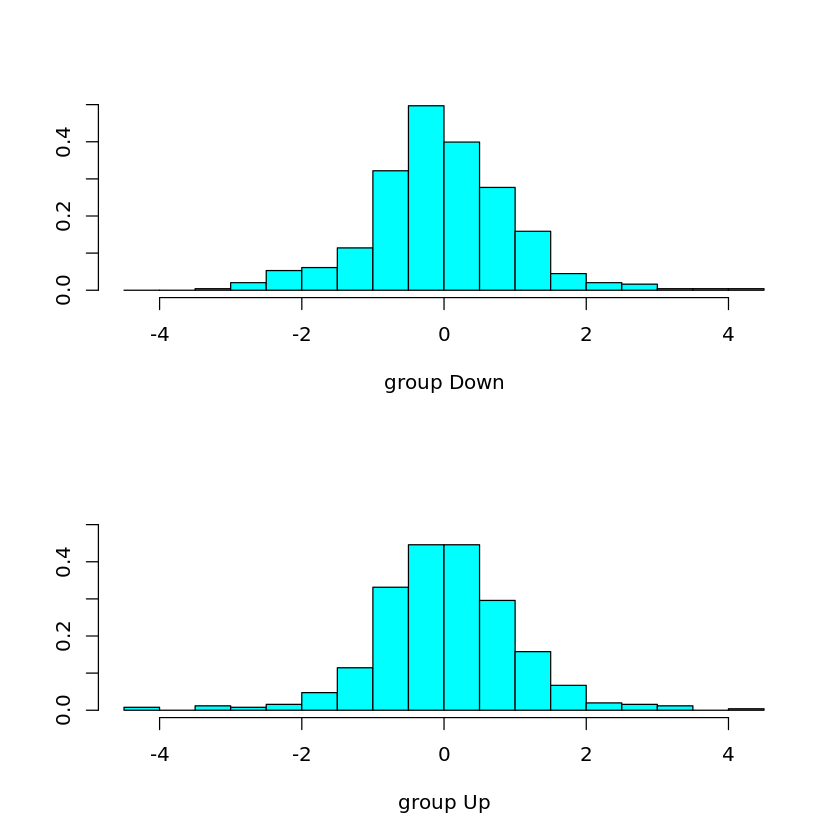

In [18]:
plot(ldaModel)

These are the plots attained by computing linear discriminant coefficiants with each training set observations, that is: $$-0.642 * \text{Lag1} - 0.514 * \text{Lag2}$$

Running ```predict()``` returns the class obtained from the LDA model, the posteriors, and the linear discriminants from above.

In [19]:
ldaPredict=predict(ldaModel, testing)
names(ldaPredict)

[1] "class"     "posterior" "x"

Let's see how well this did, compared to our logistic regression model.

In [20]:
table(ldaPredict$class, trueTesting)

      trueTesting
       Down  Up
  Down   35  35
  Up     76 106

In [21]:
mean(ldaPredict$class==trueTesting)

[1] 0.5595238

This is super similar to our logistic regression model. But with LDA, we can adjust our thresholds on our posterior probabilities--meaning we can adjust how sure we want to be before we classify an instance as 'Up' or 'Down.'

In [22]:
sum(ldaPredict$posterior[,1] > 0.9) #Sum up the number of instances that are more than 90% sure
sum(ldaPredict$posterior[,1] > 0.8)
sum(ldaPredict$posterior[,1] > 0.7)
sum(ldaPredict$posterior[,1] > 0.6)
sum(ldaPredict$posterior[,1] > 0.5)
sum(ldaPredict$posterior[,1] > 0.4) #This data set is literally the worst to teach this concept

[1] 0

[1] 0

[1] 0

[1] 0

[1] 70

[1] 252

Depending on the context and situation, you might want to adjust these values. As a doctor, you might not want to diagnose someone with a rare disease unless you're REALLY sure that they have the disease, so they don't freak out. Or you might want to MAKE SURE that they're fine and go with treatment if you have even the slightest inkling that they have the disease.

### Quadratic Discriminant Analysis

Next up, QDA!

In [23]:
qdaModel=qda(Direction~Lag1+Lag2, data=training)
qdaModel

Call:
qda(Direction ~ Lag1 + Lag2, data = training)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Here, we have the prior probabilities, just like LDA, but we do not have the coefficients--since we now have a quadratic decision boundary, rather than a linear function to separate the predictors. We can still look at the confusion matrix though.

In [24]:
qdaPredict=predict(qdaModel, testing)
table(qdaPredict$class, trueTesting)
mean(qdaPredict$class==trueTesting)

      trueTesting
       Down  Up
  Down   30  20
  Up     81 121

[1] 0.5992063

We get ~60% accuracy here.

### K-Nearest Neighbors

In [25]:
library(class)

In [26]:
 #Combine the X's we need for KNN, bc syntax lol
KNNTrainingX = cbind(training['Lag1'], training['Lag2'])
KNNTestingX = cbind(testing['Lag1'], testing['Lag2'])

In [27]:
set.seed(1)
#knn(matrix, matrix, vector, k)
KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=1)
table(KNNModel, trueTesting)
mean(KNNModel==trueTesting)

        trueTesting
KNNModel Down Up
    Down   43 58
    Up     68 83

[1] 0.5

Yikes. In this situation, KNN with k = 1 equivalent to randomly guessing. Let's bump up the K and see what we get.

In [28]:
for (x in c(2:10)) {
    KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=x)
    table(KNNModel, trueTesting)
    print(paste0('With K = ', x, ', Accuracy is: ', mean(KNNModel==trueTesting)))
}

[1] "With K = 2, Accuracy is: 0.51984126984127"
[1] "With K = 3, Accuracy is: 0.531746031746032"
[1] "With K = 4, Accuracy is: 0.527777777777778"
[1] "With K = 5, Accuracy is: 0.484126984126984"
[1] "With K = 6, Accuracy is: 0.48015873015873"
[1] "With K = 7, Accuracy is: 0.464285714285714"
[1] "With K = 8, Accuracy is: 0.476190476190476"
[1] "With K = 9, Accuracy is: 0.496031746031746"
[1] "With K = 10, Accuracy is: 0.48015873015873"


Improvements past K=3 provides no further improvements, so using KNN is 'capped' at K=3. After comparing all of the models, we can see that __quadratic discriminant analysis__ works the best for this situation.

In [29]:
#cleanup
detach(Smarket)

## Section 4.7, Problem 10

In [30]:
attach(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down
1990,-1.372,1.178,0.712,3.514,-2.576,0.1517220,0.807,Up
1990,0.807,-1.372,1.178,0.712,3.514,0.1323100,0.041,Up
1990,0.041,0.807,-1.372,1.178,0.712,0.1439720,1.253,Up
1990,1.253,0.041,0.807,-1.372,1.178,0.1336350,-2.678,Down


[1] 1089    9

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


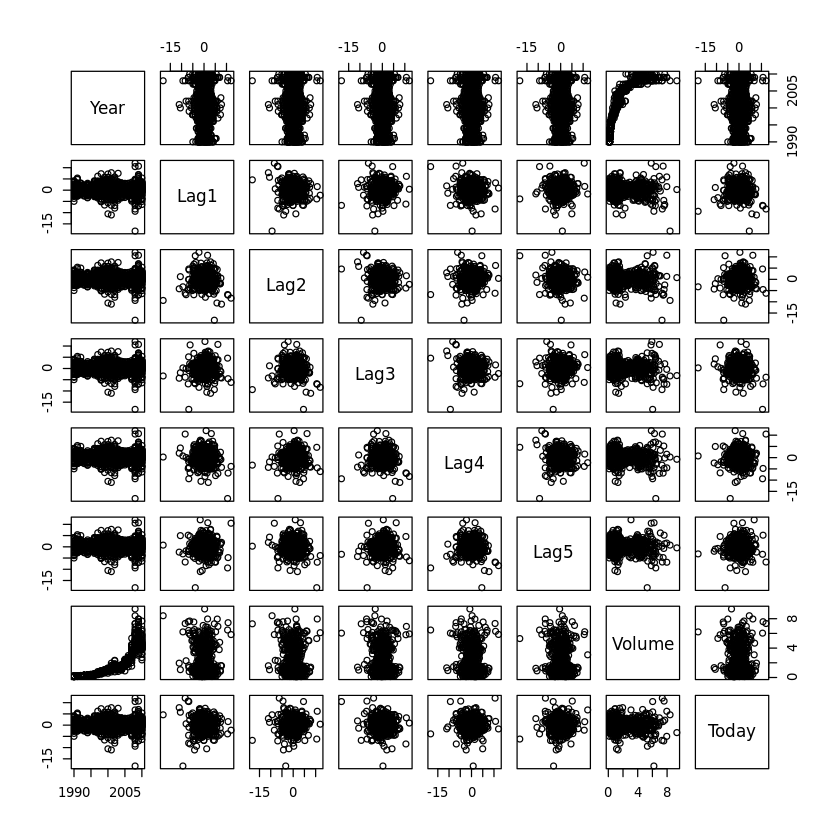

In [38]:
#print some information about the dataset
names(Weekly)
Weekly[0:10,]
dim(Weekly)
cor(Weekly[,-9])
pairs(Weekly[,-9])

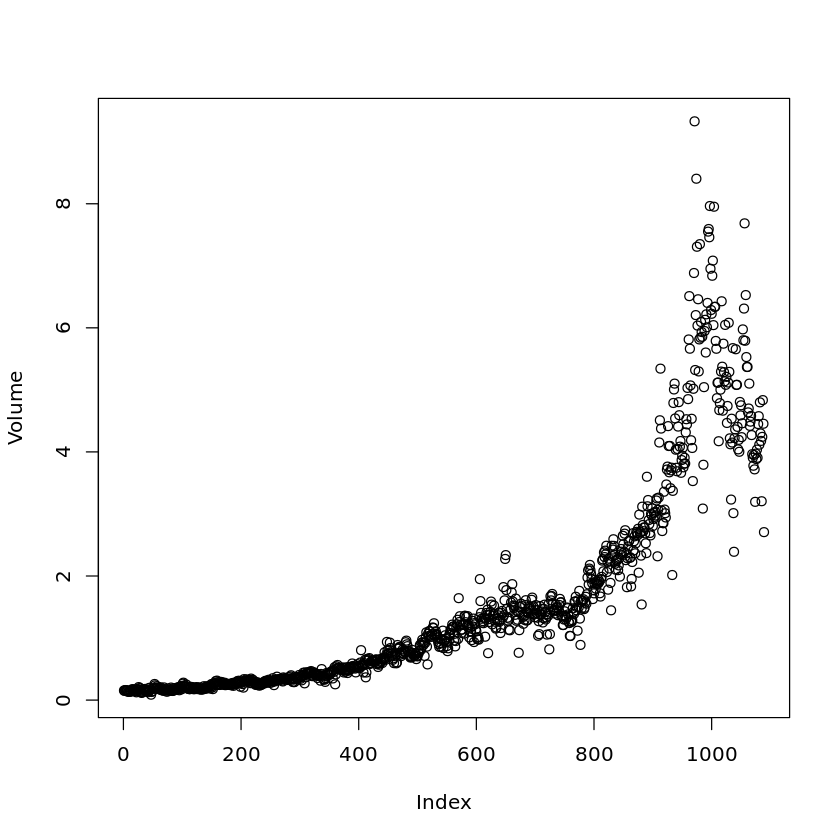

In [41]:
plot(Volume)

__a.)__ Most of the Lag pairs are clustered together, but the only relationship that seem to have significant correlation are between YearxVolume (0.841).

In [46]:
logModel = glm(Direction~Year+Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(logModel)


Call:
glm(formula = Direction ~ Year + Lag1 + Lag2 + Lag3 + Lag4 + 
    Lag5 + Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7071  -1.2578   0.9941   1.0873   1.4665  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) 17.225822  37.890522   0.455   0.6494  
Year        -0.008500   0.018991  -0.448   0.6545  
Lag1        -0.040688   0.026447  -1.538   0.1239  
Lag2         0.059449   0.026970   2.204   0.0275 *
Lag3        -0.015478   0.026703  -0.580   0.5622  
Lag4        -0.027316   0.026485  -1.031   0.3024  
Lag5        -0.014022   0.026409  -0.531   0.5955  
Volume       0.003256   0.068836   0.047   0.9623  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.2  on 1081  degrees of freedom
AIC: 1502.2

Number of Fisher Scoring iterati

__b.)__ All of the p-values are pretty high. Surprisingly, we have one star for the significant code for Lag 2, with a runner up of Lag1 that is relatively lower to the other coefficients.

In [50]:
logModelProbs = predict(logModel, type='response') #Predicts each value in the data set (lol) and then prints out the probability
logModelPredictions=rep('Down', dim(Weekly)[1]) #Creates a vector of 1089 (based on Weekly rows) and initializes them as 'down'
logModelPredictions[logModelProbs>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.

table(logModelPredictions, Direction)
mean(logModelPredictions==Direction)

                   Direction
logModelPredictions Down  Up
               Down   56  47
               Up    428 558

[1] 0.56382

__c.)__ The confusion matrix tells us that we were able to successfuly calculate 56.4% of the predictions. However, most of the data seemed to be skewed over towards the True and False Positives. The model is over-ambitious towards saying that a given instance will be 'Up'. If we used this in the real world, we might lose a lot of money, since we're wrong about our 'Down's a lot of the time. 

In [63]:
training=Weekly[Year<2009,] #training will be all instances from 1990-2008 (inclusive)
testing=Weekly[Year>=2009,] #testing will be all instances from 2008-2009.
testingLabels=Direction[Year>=2009]

#just for checks
dim(training)[1] + dim(testing)[1] == dim(Weekly)[1]

[1] TRUE

__d.)__ The following is the logistic regression model and the associated confusion matrix with just Lag2 as the predictor.

In [74]:
#retrain the model, but just on training
logModel2 = glm(Direction~Lag2, data=training, family=binomial)
summary(logModel2)

logModelProbs2 = predict(logModel2, testing, type='response') #Predicts each value in the testing data set (lol) and then prints out the probability
logModelPredictions2=rep('Down', dim(testing)[1]) #Creates a vector of 104 (based on testing rows) and initializes them as 'down'
logModelPredictions2[logModelProbs2>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.

table(logModelPredictions2, testingLabels)
mean(logModelPredictions2==testingLabels)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = training)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


                    testingLabels
logModelPredictions2 Down Up
                Down    9  5
                Up     34 56

[1] 0.625

__e.)__ Repeat the above for linear discriminant analysis.

In [81]:
ldaModel = lda(Direction~Lag2, data=training)
ldaModelPredictions = predict(ldaModel, testing, type='reponse')
table(ldaModelPredictions$class, testingLabels)
mean(ldaModelPredictions$class==testingLabels)

      testingLabels
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

__f.)__ Repeat the above for quadratic discriminant analysis.

In [86]:
qdaModel = qda(Direction~Lag2, data=training)
qdaModelPredictions = predict(qdaModel, testing, type='response')
table(qdaModelPredictions$class, testingLabels)
mean(ldaModelPredictions$class==testingLabels)

      testingLabels
       Down Up
  Down    0  0
  Up     43 61

[1] 0.625

__g.)__ Repeat the above for K Nearest Neighbors with K = 1.

In [97]:
 #Combine the X's we need for KNN, bc syntax lol
set.seed(1)
KNNTrainingX = cbind(training['Lag2'])
KNNTestingX = cbind(testing['Lag2'])
#knn(matrix, matrix, vector, k)
KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=1)
table(KNNModel, testingLabels)
mean(KNNModel==testingLabels)

        testingLabels
KNNModel Down Up
    Down   21 30
    Up     22 31

[1] 0.5

__h.)__ On this data, it seems that linear discriminant analysis has the best results. Even though it is the same 62.5% accuracy as QDA, the model in QDA decided that it would be best to predict EVERYTHING as an 'Up.' If this were the case in reality, I would be a very rich man.

__i.)__ Playing around:

In [105]:
for (x in c(2:10)) {
    KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=x)
    print(paste0('With K = ', x, ', Accuracy is: ', mean(KNNModel==testingLabels)))
}

[1] "With K = 2, Accuracy is: 0.480769230769231"
[1] "With K = 3, Accuracy is: 0.538461538461538"
[1] "With K = 4, Accuracy is: 0.625"
[1] "With K = 5, Accuracy is: 0.548076923076923"
[1] "With K = 6, Accuracy is: 0.548076923076923"
[1] "With K = 7, Accuracy is: 0.548076923076923"
[1] "With K = 8, Accuracy is: 0.586538461538462"
[1] "With K = 9, Accuracy is: 0.557692307692308"
[1] "With K = 10, Accuracy is: 0.548076923076923"


It seems that using K = 4 has a pretty good accuracy as well.

In [108]:
KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=4)
table(KNNModel, testingLabels)
mean(KNNModel==testingLabels)

        testingLabels
KNNModel Down Up
    Down   19 18
    Up     24 43

[1] 0.5961538

I want to try to see what each model would look like if we had the same amount of 'UP's as we did 'DOWN's.

In [139]:
downSet=Weekly[Direction=='Down',] #Set of just Down Directions
upSet=Weekly[Direction=='Up',] #Set of just Up Directions

smallUpSet=upSet[sample(nrow(upSet), dim(downSet)[1]),] #Randomly sampled from Ups, same number of Downs as Ups
# for checks
dim(downSet)[1] == dim(smallUpSet)[1]
newDataSet = rbind(downSet, smallUpSet) #Stack the rows on top of each other.

[1] TRUE

In [140]:
#CLEANUP LOL
detach(Weekly)
attach(newDataSet)

In [145]:
#new training and testing datasets.
training=newDataSet[Year<2009,]
testing=newDataSet[Year>=2009,]
testingLabels=Direction[Year>=2009]

# dim(training)[1]
# dim(testing)[1]
# dim(newDataSet)[1]

#for checks <-- good thing i checked because i didn't cleanup (cell above #proudofmyself)
dim(training)[1] + dim(testing)[1] == dim(newDataSet)[1]

[1] TRUE

In [146]:
#retrain the model, but just on training
logModel = glm(Direction~Lag2, data=training, family=binomial)
summary(logModel)

logModelProbs = predict(logModel, testing, type='response') #Predicts each value in the testing data set (lol) and then prints out the probability
logModelPredictions=rep('Down', dim(testing)[1]) #Creates a vector of 104 (based on testing rows) and initializes them as 'down'
logModelPredictions[logModelProbs>.5]='Up' #Takes the indices where logModelProbs > .5 and chagnes them to 'Up'.

table(logModelPredictions, testingLabels)
mean(logModelPredictions==testingLabels)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4785  -1.1734  -0.9831   1.1771   1.4637  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.02023    0.06785  -0.298   0.7656  
Lag2         0.06719    0.03098   2.169   0.0301 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1215.8  on 876  degrees of freedom
Residual deviance: 1210.9  on 875  degrees of freedom
AIC: 1214.9

Number of Fisher Scoring iterations: 4


                   testingLabels
logModelPredictions Down Up
               Down   21 23
               Up     22 25

[1] 0.5054945

In [147]:
ldaModel = lda(Direction~Lag2, data=training)
ldaModelPredictions = predict(ldaModel, testing, type='reponse')
table(ldaModelPredictions$class, testingLabels)
mean(ldaModelPredictions$class==testingLabels)

      testingLabels
       Down Up
  Down   21 23
  Up     22 25

[1] 0.5054945

In [148]:
qdaModel = qda(Direction~Lag2, data=training)
qdaModelPredictions = predict(qdaModel, testing, type='response')
table(qdaModelPredictions$class, testingLabels)
mean(ldaModelPredictions$class==testingLabels)

      testingLabels
       Down Up
  Down   22 26
  Up     21 22

[1] 0.5054945

In [151]:
set.seed(1)
KNNTrainingX = cbind(training['Lag2'])
KNNTestingX = cbind(testing['Lag2'])
#knn(matrix, matrix, vector, k)
KNNModel=knn(KNNTrainingX, KNNTestingX, training[['Direction']], k=4)
table(KNNModel, testingLabels)
mean(KNNModel==testingLabels)

        testingLabels
KNNModel Down Up
    Down   23 20
    Up     20 28

[1] 0.5604396

The confusion matrix seems a LOT more balanced now, but we get lower predictive values. These predictions should vary with different samples of the ```Direction=='Up'``` but I thought it was really cool that my accuracy of logistic regression, LDA, and QDA were all the same, so I don't want to re-run the kernal HAHA.